<a href="https://colab.research.google.com/github/siddhant250502/Netflix-Quarterly-Subscription-Predictions/blob/main/Netflix_Subscription_Growth_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [4]:
data = pd.read_csv('Dataset.csv')
data['Time Period'] = pd.to_datetime(data['Time Period'],
                                     format='%d/%m/%Y')

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Time Period'],
                         y=data['Subscribers'],
                         mode='lines', name='Subscribers'))
fig.update_layout(title='Netflix Quaterly Subscription Growth',
                  xaxis_title='Date',
                  yaxis_title='Netflix Subscriptions')
fig.show()


In [7]:
# Calculate the quarterly growth rate
data['Quarterly Growth Rate'] = data['Subscribers'].pct_change() * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = data['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Time Period'],
    y=data['Quarterly Growth Rate'],
    marker_color=data['Bar Color'],
    name='Quarterly Growth Rate'
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()

In [8]:
#Calculate the yearly growth rate
data['Year'] = data['Time Period'].dt.year
yearly_growth = data.groupby('Year')['Subscribers'].pct_change().fillna(0)

#Create a new column for bar color
data['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

#Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Year'],
    y = yearly_growth,
    marker_color = data['Bar Color'],
    name = 'Yearly Growth Rate'
))
fig.update_layout(title = 'Netflix Yearly Subscriber Growth Rate',
                  xaxis_title = 'Year',
                  yaxis_title = 'Yearly Growth Rate(%)')
fig.show()

In [9]:
#Using ARIMA for time series forcasting
time_series = data.set_index('Time Period')['Subscribers']

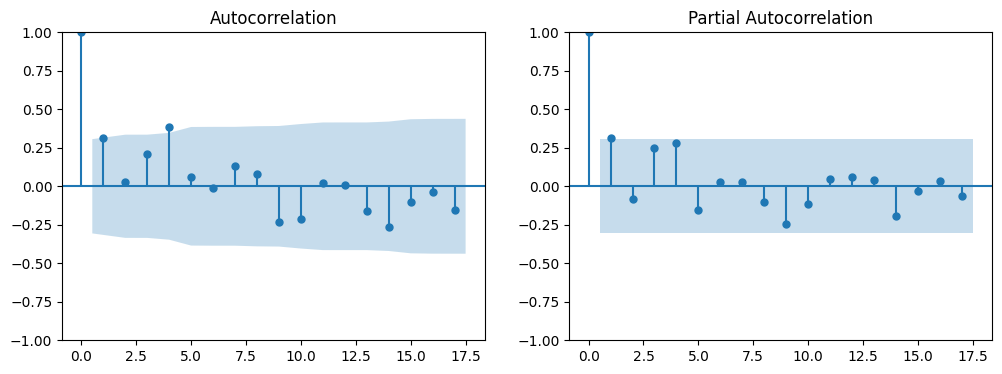

In [10]:
# finding the value of p and q by plotting ACF and PACF
differenced_series = time_series.diff().dropna()

#Plot ACF and PACF for differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [11]:
#Now we use ARIMA model on our data
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p,d,q))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Sat, 14 Oct 2023   AIC                           1351.986
Time:                        06:53:05   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.765      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

In [12]:
#making predictions using the trained model
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)

In [13]:
#lets visualize the results of netflix subscriptions forecasting for next 5 quarters

#create a dataframe with the original data and predictions
forecast = pd.DataFrame({'Original' : time_series, 'Predictions' : predictions})

#plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='Netflix Quarterly Subscription Predictions',
                  xaxis_title='Time Period',
                  yaxis_title='Subscribers',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()